In [460]:
reset -fs

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import median_absolute_error as medae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_formats = ['retina']  # or svg
%matplotlib inline
sns.set(context='notebook', style='whitegrid')

In [462]:
data = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/ds_train.csv")
data2 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/ds_test.csv")
data = pd.concat([data, data2], ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       962 non-null    float64
 1   JobNum           1025 non-null   int64  
 2   JobTitle         1025 non-null   object 
 3   Company          1025 non-null   object 
 4   Location         1025 non-null   object 
 5   CompanyRating    1025 non-null   float64
 6   Salary           921 non-null    object 
 7   Remote           1025 non-null   int64  
 8   Urgent           1025 non-null   int64  
 9   EasilyApply      1025 non-null   int64  
 10  PostedDate       1025 non-null   object 
 11  ExtractDate      1025 non-null   object 
 12  ExtractedSalary  1025 non-null   float64
 13  PostAge          1025 non-null   float64
 14  JobNum.1         63 non-null     float64
dtypes: float64(5), int64(4), object(6)
memory usage: 120.2+ KB


In [463]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       962 non-null    float64
 1   JobNum           1025 non-null   int64  
 2   JobTitle         1025 non-null   object 
 3   Company          1025 non-null   object 
 4   Location         1025 non-null   object 
 5   CompanyRating    1025 non-null   float64
 6   Salary           921 non-null    object 
 7   Remote           1025 non-null   int64  
 8   Urgent           1025 non-null   int64  
 9   EasilyApply      1025 non-null   int64  
 10  PostedDate       1025 non-null   object 
 11  ExtractDate      1025 non-null   object 
 12  ExtractedSalary  1025 non-null   float64
 13  PostAge          1025 non-null   float64
 14  JobNum.1         63 non-null     float64
dtypes: float64(5), int64(4), object(6)
memory usage: 120.2+ KB


In [464]:
data = data.drop(['Unnamed: 0', 'JobNum.1'], axis=1)

In [465]:
data = data.drop_duplicates()

In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   JobNum           1025 non-null   int64  
 1   JobTitle         1025 non-null   object 
 2   Company          1025 non-null   object 
 3   Location         1025 non-null   object 
 4   CompanyRating    1025 non-null   float64
 5   Salary           921 non-null    object 
 6   Remote           1025 non-null   int64  
 7   Urgent           1025 non-null   int64  
 8   EasilyApply      1025 non-null   int64  
 9   PostedDate       1025 non-null   object 
 10  ExtractDate      1025 non-null   object 
 11  ExtractedSalary  1025 non-null   float64
 12  PostAge          1025 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 112.1+ KB


# Median Salary for Data Scientists

In [467]:
median_sal = data.ExtractedSalary.median()
median_sal

99.0

# High (above 3.4) vs (3.4 or lower) Low Company Rating

In [468]:
low_rating = data[data.CompanyRating < 3.5]
low_rating_sal = low_rating.ExtractedSalary.mean()
low_rating_sal

97.79255319148936

In [469]:
high_rating = data[data.CompanyRating > 3.4]
high_rating_sal = high_rating.ExtractedSalary.mean()
high_rating_sal

100.6678614097969

# Remote vs Non-Remote Salaries. It was found Remote pays more. Remote pays 100k compared 95.5k for Non-Remote.

In [470]:
remote = data[data.Remote == 1]
remote_sal = remote.ExtractedSalary.mean()
remote_sal

100.51057082452431

In [471]:
non_remote = data[data.Remote == 0]
non_remote_sal = non_remote.ExtractedSalary.mean()
non_remote_sal

95.70886075949367

# Old Post vs New Post Salaries. It was found Old Posts pay more. 101.4k vs 98.0k. 

In [472]:
old_posts = data[data.PostAge == 30]
old_post_sal = old_posts.ExtractedSalary.mean()
old_post_sal

101.32957746478873

In [473]:
fresh_posts = data[data.PostAge < 30]
new_post_sal = fresh_posts.ExtractedSalary.mean()
new_post_sal

97.46031746031746

# Urgent vs Non-Urgent Salaries. It was found Urgent Posts pay less. Urgent = 92.7k, Non-Urgent = 101.2k. 

In [474]:
urgent = data[data.Urgent == 1]
urgent_sal = urgent.ExtractedSalary.mean()
urgent_sal

92.21904761904761

In [475]:
non_urgent = data[data.Urgent == 0]
non_urgent_sal = non_urgent.ExtractedSalary.mean()
non_urgent_sal

101.04456521739131

# Easily Apply vs Non-Easily Apply. Non-Easily Apply Jobs pay more. 100.5k vs 100k.

In [476]:
easy_apply = data[data.EasilyApply == 1]
ez_sal = easy_apply.ExtractedSalary.mean()
ez_sal

100.0

In [477]:
non_ez_apply = data[data.EasilyApply == 0]
non_ez_sal = non_ez_apply.ExtractedSalary.mean()
non_ez_sal

100.19148936170212

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


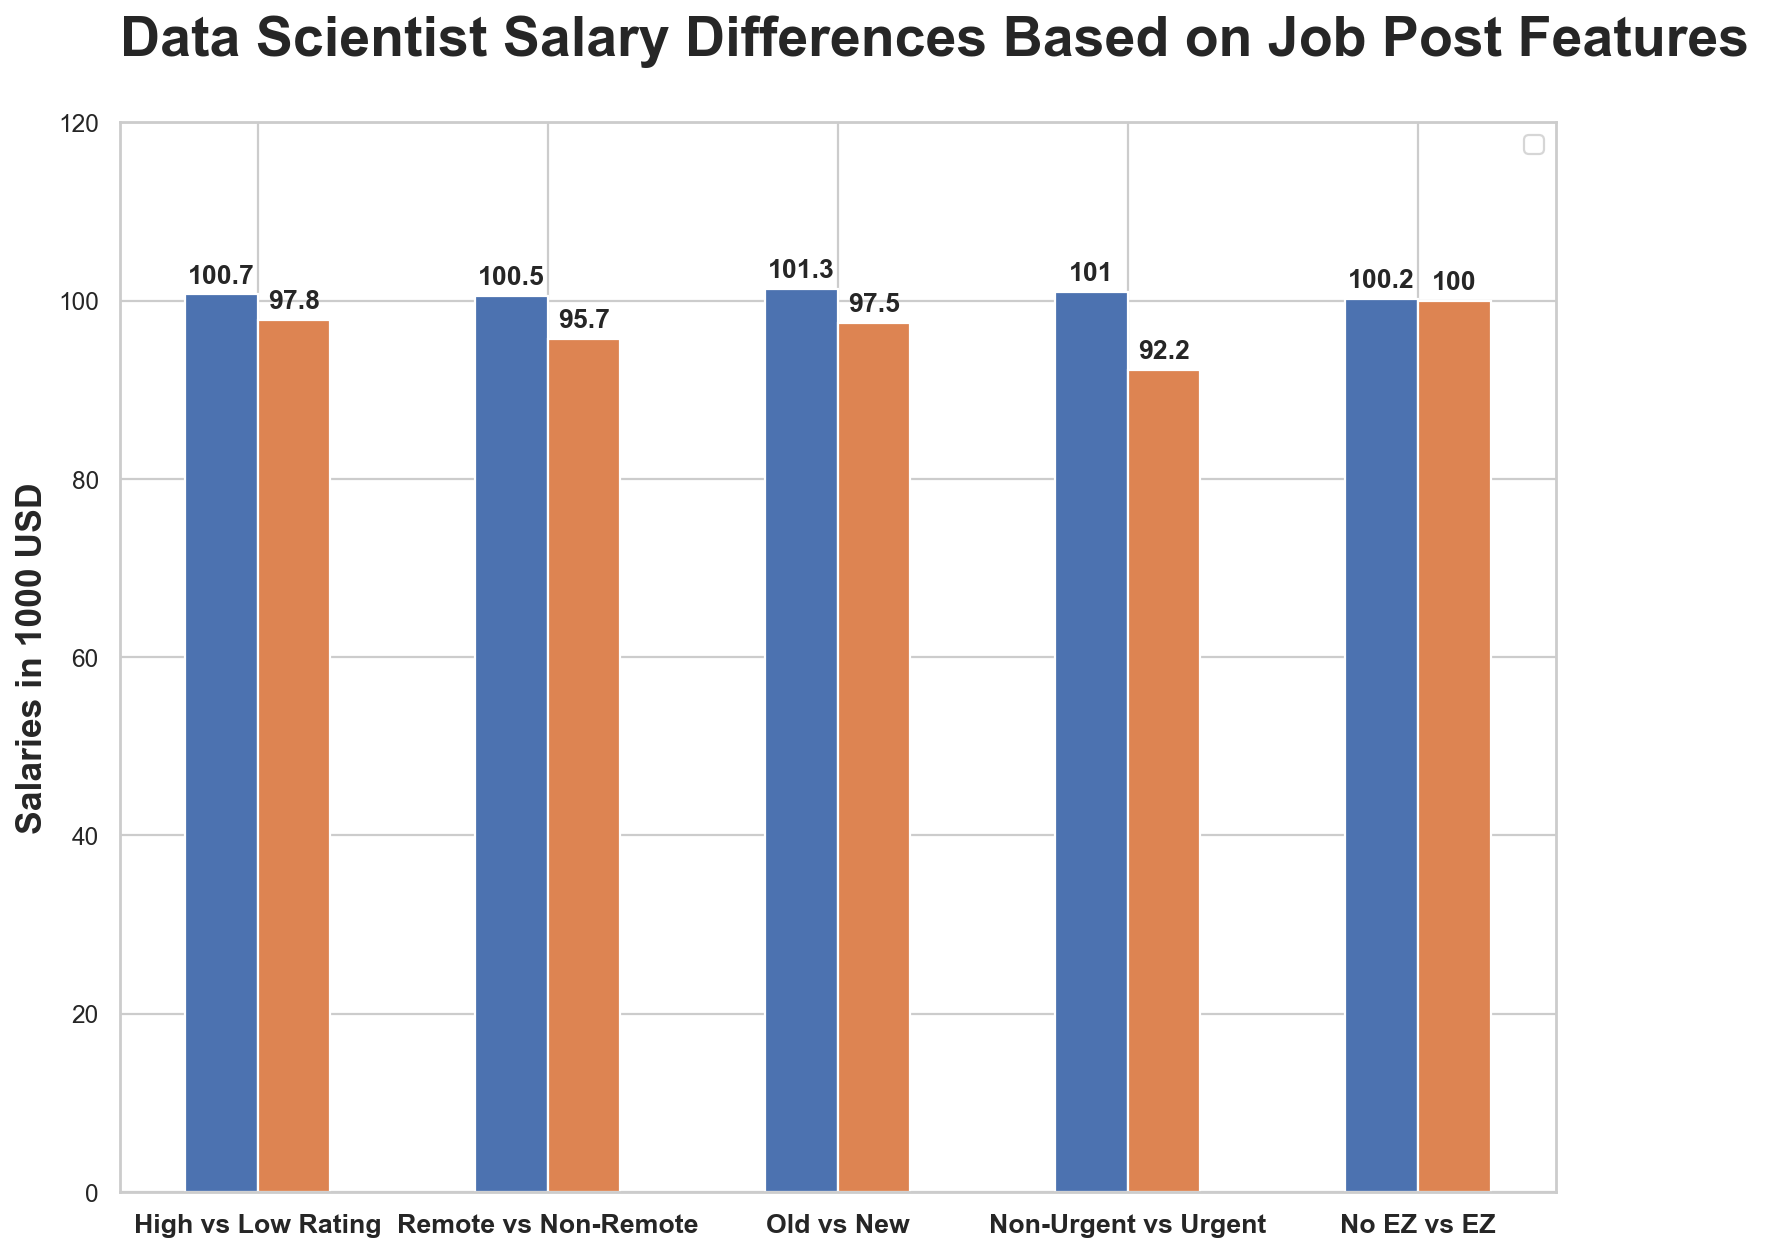

In [478]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

# figure(figsize=(10, 8), dpi=80)

labels = ['High vs Low Rating', 'Remote vs Non-Remote', 'Old vs New', 'Non-Urgent vs Urgent', 'No EZ vs EZ']
first_means = [100.7, 100.5, 101.3, 101.0, 100.2]
second_means = [97.8, 95.7, 97.5, 92.2, 100.0]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
rects1 = ax.bar(x - width/2, first_means, width)
rects2 = ax.bar(x + width/2, second_means, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Salaries in 1000 USD', fontsize=16, weight='bold')
ax.set_title('Data Scientist Salary Differences Based on Job Post Features', fontsize=25, loc='left', pad=30, weight='bold')
ax.set_xticks(x, labels, fontsize=12, weight='bold')
ax.set_yticks(np.arange(0, 130, 20), weight='bold')
ax.legend()

ax.bar_label(rects1, padding=3, weight='bold')
ax.bar_label(rects2, padding=3, weight='bold')

fig.tight_layout()
plt.savefig('C:/Users/New User/Desktop/reg/DS_sal.png', dpi=300, bbox_inches = "tight")
plt.show()


# Linear Regression, and Training and Validation Comparsion Using Median Absolute Error (MAE) for All Posts

# Train vs Validation for all data

In [479]:
df_train, df_val = train_test_split(data, test_size=.2, random_state=40)
print(df_train.shape)
print(df_val.shape)

(820, 13)
(205, 13)


In [480]:
# ALL FEATURES

lr = LinearRegression()
lr.fit(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))


y_pred_2 = lr.predict(df_val[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for validation data is: ' + str(medae(df_val['ExtractedSalary'], y_pred_2)))

Median absolute error for training data is: 10.78766794365476
Median absolute error for validation data is: 10.452029370661052


# Cross-Validation with Train, Val, Test for all data

In [481]:
df = data

In [482]:
# Split data X into train, val, and test sets

X, X_test, y, y_test = train_test_split(df[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], 
                                        df['ExtractedSalary'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [483]:
# Train vs Validation using MAE as a metric

lr = LinearRegression()
lr.fit(X_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], y_train)

y_pred = lr.predict(X_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for training data is: ' + str(medae(y_train, y_pred)))

y_pred_2 = lr.predict(X_val[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for validation data is: ' + str(medae(y_val, y_pred_2)))

Median absolute error for training data is: 11.414812465110899
Median absolute error for validation data is: 7.901953895465724


In [484]:
# Train all on data and test on test set using MAE as a metric

lr = LinearRegression()
lr.fit(X[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], y)

y_pred = lr.predict(X[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for all data is: ' + str(medae(y, y_pred)))

y_pred_2 = lr.predict(X_test[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for test data is: ' + str(medae(y_test, y_pred_2)))

Median absolute error for all data is: 10.78766794365476
Median absolute error for test data is: 10.452029370661052


In [275]:
# # Dropping EZ Apply Feature (Training vs Validation)

# lr = LinearRegression()
# lr.fit(X_train[['CompanyRating', 'Remote', 'Urgent', 'PostAge']], y_train)

# y_pred = lr.predict(X_train[['CompanyRating', 'Remote', 'Urgent', 'PostAge']])
# print('Median absolute error for training data is: ' + str(medae(y_train, y_pred)))

# y_pred_2 = lr.predict(X_val[['CompanyRating', 'Remote', 'Urgent', 'PostAge']])
# print('Median absolute error for validation data is: ' + str(medae(y_val, y_pred_2)))

Median absolute error for training data is: 10.13968499110959
Median absolute error for validation data is: 10.735521501447963


In [276]:
# # Dropping EZ Apply feature (Training vs Testing)

# lr = LinearRegression()
# lr.fit(X[['CompanyRating', 'Remote', 'Urgent', 'PostAge']], y)

# y_pred = lr.predict(X[['CompanyRating', 'Remote', 'Urgent', 'PostAge']])
# print('Median absolute error for all data is: ' + str(medae(y, y_pred)))

# y_pred_2 = lr.predict(X_test[['CompanyRating', 'Remote', 'Urgent', 'PostAge']])
# print('Median absolute error for test data is: ' + str(medae(y_test, y_pred_2)))


Median absolute error for all data is: 9.970323822184284
Median absolute error for test data is: 13.653007631683593


In [273]:
# # TESTING ON IMPORTED TEST SET -- TEST #2

# lr = LinearRegression()
# lr.fit(X[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], y)

# y_pred = lr.predict(X[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
# print('Median absolute error for all data is: ' + str(medae(y, y_pred)))

# df_test = pd.read_csv('C:/Users/New User/Documents/GitHub/NBM_Regression_Student/ds_test.csv')

# y_pred_2 = lr.predict(df_test[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
# print('Median absolute error for test data is: ' + str(medae(df_test['ExtractedSalary'], y_pred_2)))

Median absolute error for all data is: 9.989470075013415
Median absolute error for test data is: 12.762187174901783


# K-Fold Cross Validation

In [277]:
from __future__ import division, print_function
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LassoCV, RidgeCV, ElasticNetCV

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

In [280]:
X_train, X_test, y_train, y_test = train_test_split(df[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], 
                                        df['ExtractedSalary'], test_size=0.1, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [319]:
lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean R Squared Score: ", np.mean(scores))

# Build the Model
lin_reg_est.fit(X_train, y_train)

[-0.01029335  0.00279845 -0.02434831  0.00293359 -0.01421307]
Linear Reg Mean R Squared Score:  -0.008624536834508012


LinearRegression()

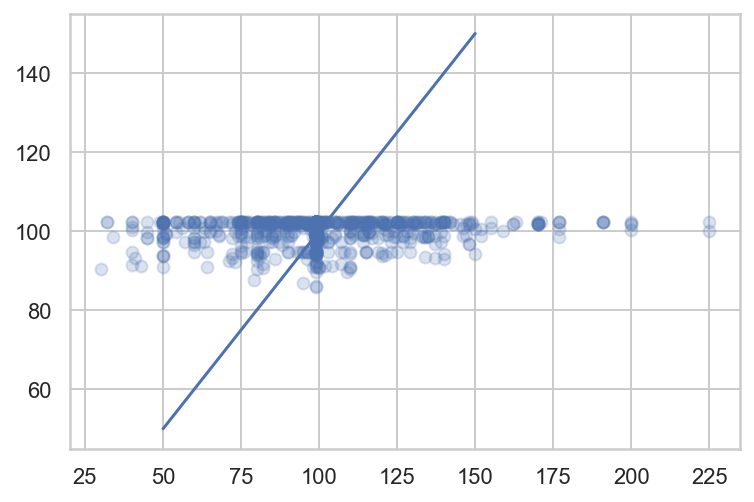

In [320]:
# Fitted vs. Actual
y_train_pred = lin_reg_est.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([50, 150], [50, 150])

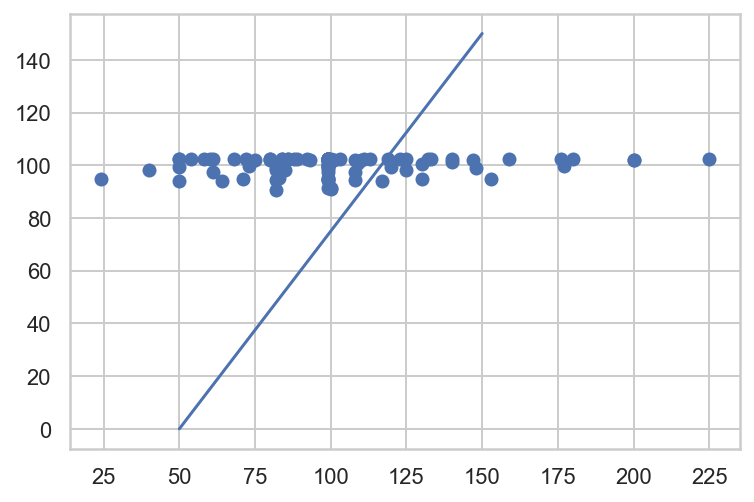

In [321]:
# Fitted vs. Actual
y_test_pred = lin_reg_est.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.plot([50, 150], [0, 150])

Text(0.5, 1.0, 'Residuals vs. Predictions')

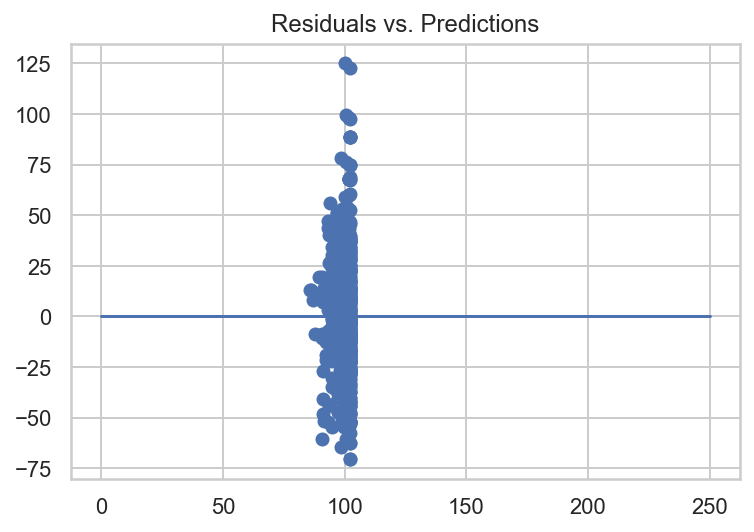

In [322]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.plot([0,250], [0, 0])
plt.title("Residuals vs. Predictions")

# Lasso

In [323]:
# Run the cross validation, find the best alpha, 
#refit the model on all the data with that alpha

# use grid search to find alpha
alpha = np.logspace(-4, 2, 100)
param_grid = dict(alpha=alpha)
grid = GridSearchCV(Lasso(), param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', cv = kfold)
grid_result = grid.fit(X_train, y_train)


print('Best Score: ', grid_result.best_score_)
print('Best Param: ', grid_result.best_params_)

Best Score:  -17.10056801095927
Best Param:  {'alpha': 24.77076355991714}


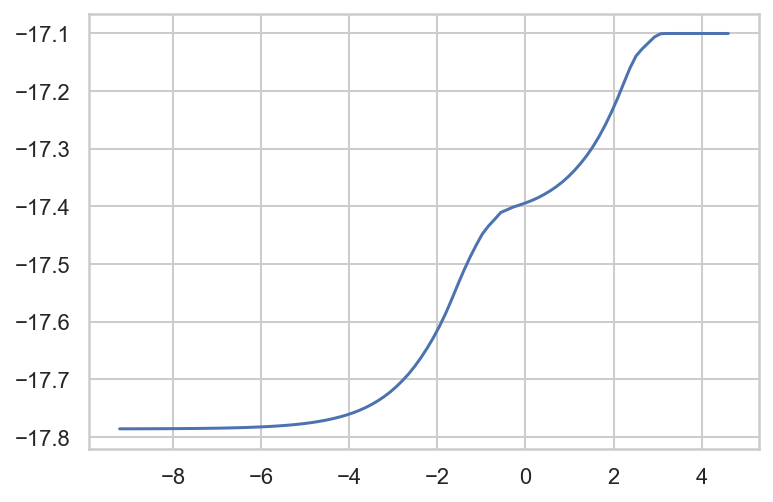

In [324]:
#plotting neg MAE for diff alpha values

df = pd.DataFrame(grid_result.cv_results_)
plt.plot(np.log(alpha), df['mean_test_score'])

In [325]:
lr_model_lasso = LassoCV(alphas= [24.77], cv = kfold)
lr_model_lasso.fit(X_train, y_train)
print('Lasso Mean R Squared Score: ', lr_model_lasso.score(
    X_train, y_train))
      

Lasso Mean R Squared Score:  0.0


In [326]:
X_train_np = X_train.to_numpy()
print(X_train_np)

[[ 4.1  1.   0.   0.  30. ]
 [ 3.8  1.   0.   0.  30. ]
 [ 3.5  1.   0.   0.  30. ]
 ...
 [ 4.1  1.   0.   0.   4. ]
 [ 5.   1.   0.   0.  30. ]
 [ 3.3  1.   0.   0.  30. ]]


In [327]:
y_train_np = y_train.to_numpy()
print(y_train_np)

[ 74.  99. 119.  86.  99.  99.  99.  99.  99.  93. 110.  99.  99. 100.
 148.  72.  76.  99.  81. 103.  85.  99.  99. 113.  50.  99.  89.  99.
  68.  80.  75. 135. 121. 114.  99.  99. 134. 114. 124. 134.  99. 135.
  86.  60.  80. 146.  99.  82.  99.  99.  74.  73. 121.  69. 111. 117.
 116.  60. 106.  75. 142.  63.  90.  99.  96. 127.  98. 136.  96. 101.
  96.  99. 110. 134.  96.  99. 115.  91.  99. 126. 104.  99.  99.  90.
  50.  82.  99.  84.  90.  99.  84. 115.  99. 200.  99. 128.  54.  99.
 170.  80. 105.  41.  99. 114. 113.  99.  93. 136. 131.  90.  99.  82.
 200.  81.  65.  99.  99.  99.  99.  99.  99. 126. 170. 115.  90.  99.
 114.  99.  99.  99. 127.  99. 139.  65. 120.  99.  99.  99.  99.  99.
 103.  80.  99.  91.  99.  99. 148. 101.  74.  99.  91.  78. 149. 125.
  40.  99.  89.  99.  99.  99.  89. 116. 100.  85.  93. 101. 191. 139.
  99.  86.  68. 110. 137.  34.  93.  99.  99.  74.  64.  82. 139.  94.
 105.  99. 111.  99.  80.  95. 141.  99. 116.  67.  84. 137. 150.  50.
  99. 

In [328]:
## Note: lars_path takes numpy matrices, not pandas dataframes

from sklearn.linear_model import lars_path

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_train_np, y_train_np, 
                             method='lasso')

Computing regularization path using the LARS ...


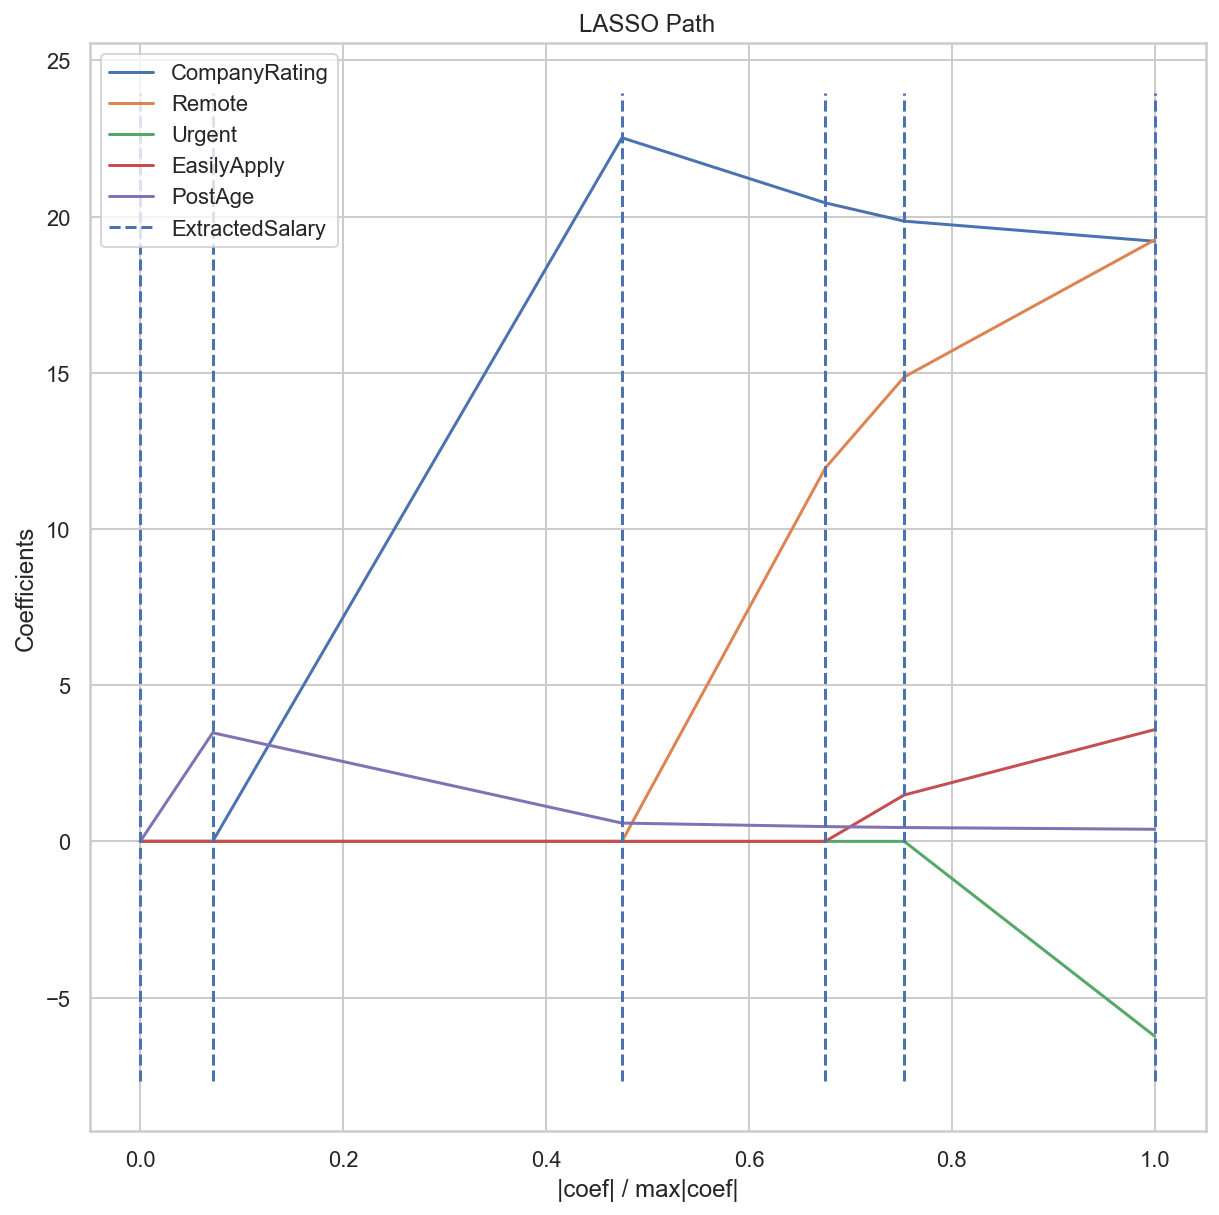

In [329]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge', 'ExtractedSalary'])
plt.show()

# Ridge

In [330]:
# Run the cross validation, find the best alpha, 
#refit the model on all the data with that alpha

# use grid search to find alpha
alpha = np.logspace(-4, 2, 100) #np.logspace(-4, -.1, 20)
param_grid = dict(alpha=alpha)
grid_ridge = GridSearchCV(Ridge(), param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', cv = kfold)
grid_result_ridge = grid_ridge.fit(X_train, y_train)


print('Best Score: ', grid_result_ridge.best_score_)
print('Best Param: ', grid_result_ridge.best_params_)

Best Score:  -17.47739665758722
Best Param:  {'alpha': 100.0}


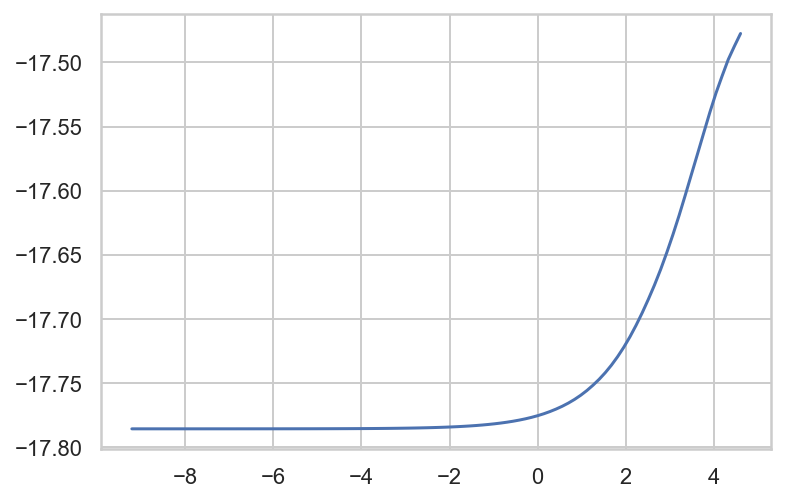

In [331]:
#plotting neg MAE for diff alpha values

df = pd.DataFrame(grid_result_ridge.cv_results_)
plt.plot(np.log(alpha), df['mean_test_score'])

In [332]:
lr_model_ridge = RidgeCV(alphas= [100.0], cv = kfold)
lr_model_ridge.fit(X_train, y_train)
print('Ridge Mean R Squared Score: ', lr_model_ridge.score(
    X_train, y_train))

Ridge Mean R Squared Score:  0.010532134048137243


# Elastic Net

In [333]:
# Run the cross validation, find the best alpha, 
#refit the model on all the data with that alpha

# use grid search to find alpha
alpha = np.logspace(-4, 2, 100) #np.logspace(-4, -.1, 20)
param_grid = dict(alpha=alpha)
grid_en = GridSearchCV(ElasticNet(), param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', cv = kfold)
grid_result_en = grid_en.fit(X_train, y_train)


print('Best Score: ', grid_result_en.best_score_)
print('Best Param: ', grid_result_en.best_params_)

Best Score:  -17.10056801095927
Best Param:  {'alpha': 49.770235643321136}


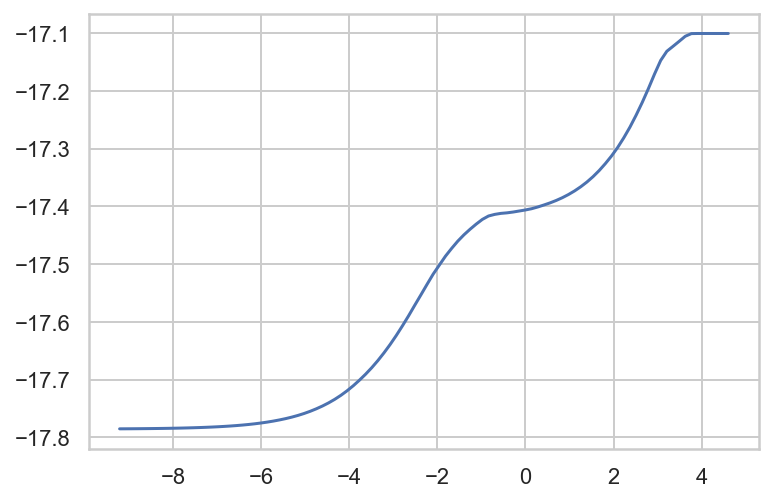

In [334]:
#plotting neg MAE for diff alpha values

df = pd.DataFrame(grid_result_en.cv_results_)
plt.plot(np.log(alpha), df['mean_test_score'])

In [335]:
lr_model_en = ElasticNetCV(alphas= [49.77], cv = kfold)
lr_model_en.fit(X_train, y_train)
print('ElasticNet Mean R Squared Score: ', lr_model_en.score(
    X_train, y_train))

ElasticNet Mean R Squared Score:  0.0


# Evaluating Models Using Test Sets

In [346]:
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression:", f'{r2_score(y_test, y_pred): .5f}')

lasso = Lasso(alpha = 24.77).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Lasso Regression:", f'{r2_score(y_test, y_pred): .5f}')

ridge = Ridge(alpha = 100.0).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Ridge Regression:", f'{r2_score(y_test, y_pred): .5f}')

en = ElasticNet(alpha = 49.77).fit(X_train, y_train)
y_pred = en.predict(X_test)
print("ElasticNet Regression:", f'{r2_score(y_test, y_pred): .5f}')

Linear Regression:  0.01755
Lasso Regression: -0.00146
Ridge Regression:  0.00890
ElasticNet Regression: -0.00146


# Since Linear Regression is best model, let's test it out with a higher degree of polynomial with n=2

In [348]:
from sklearn.preprocessing import PolynomialFeatures


In [349]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
print(f"{lr_poly.score(X_train_poly,y_train):,.6f}")

0.045902


In [350]:
# Score on validation set
print(f"{lr_poly.score(X_val_poly, y_val):,.6f}")

0.010988


# For poly, train and val data differ wildly, so it's not better than Linear Regression

# Cross-Val with MAE

In [485]:
from __future__ import division, print_function
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LassoCV, RidgeCV, ElasticNetCV

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

In [486]:
X_train, X_test, y_train, y_test = train_test_split(data[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], 
                                        data['ExtractedSalary'], test_size=0.1, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [487]:
from sklearn.metrics import make_scorer, median_absolute_error

lin_reg_est = LinearRegression()
mae = make_scorer(median_absolute_error)

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold, scoring=mae)
print(scores)
print("Linear Reg Mean R Squared Score: ", np.mean(scores))

# Build the Model
lin_reg_est.fit(X_train, y_train)

[ 9.40090445 11.82501208 10.04313279 11.28223594 10.64827768]
Linear Reg Mean R Squared Score:  10.639912589117879


LinearRegression()

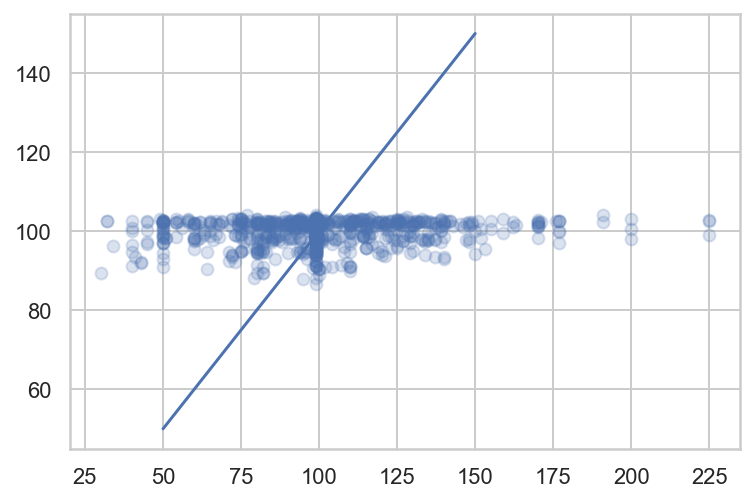

In [488]:
# Fitted vs. Actual
y_train_pred = lin_reg_est.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([50, 150], [50, 150])

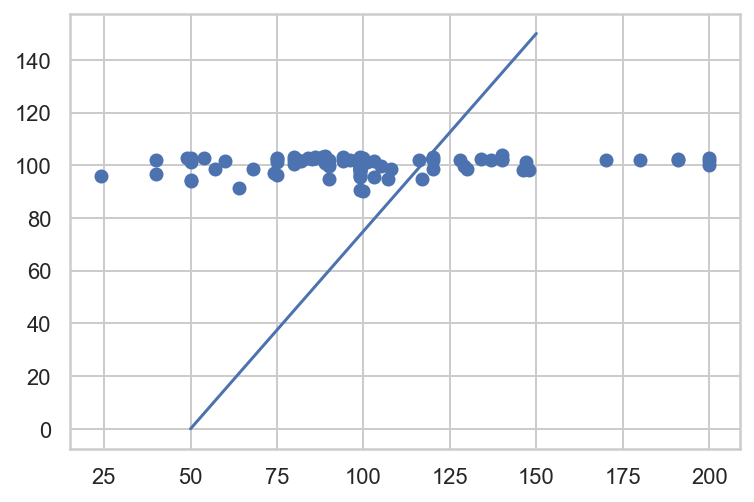

In [489]:
# Fitted vs. Actual
y_test_pred = lin_reg_est.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.plot([50, 150], [0, 150])

Text(0.5, 1.0, 'Residuals vs. Predictions')

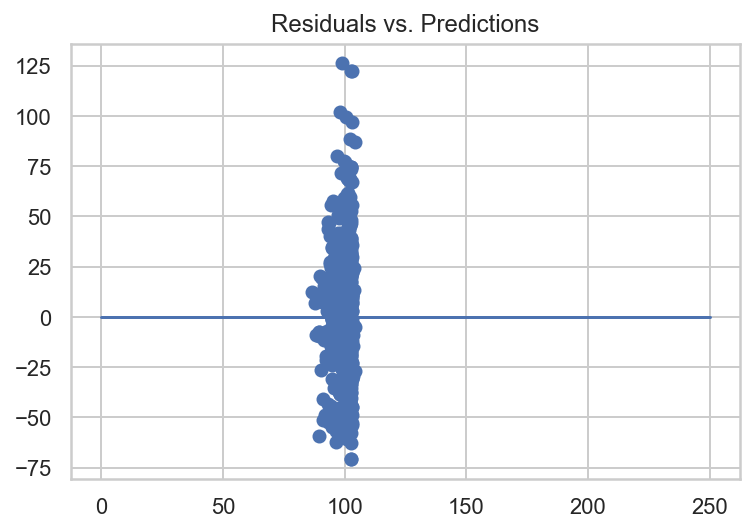

In [490]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.plot([0,250], [0, 0])
plt.title("Residuals vs. Predictions")

In [491]:
# Run the cross validation, find the best alpha, 
#refit the model on all the data with that alpha

# use grid search to find alpha
alpha = np.logspace(-4, 2, 100)
param_grid = dict(alpha=alpha)
grid = GridSearchCV(Lasso(), param_grid=param_grid, 
                    scoring=mae, cv = kfold)
grid_result = grid.fit(X_train, y_train)


print('Best Score: ', grid_result.best_score_)
print('Best Param: ', grid_result.best_params_)

Best Score:  10.863290307906189
Best Param:  {'alpha': 0.16297508346206452}


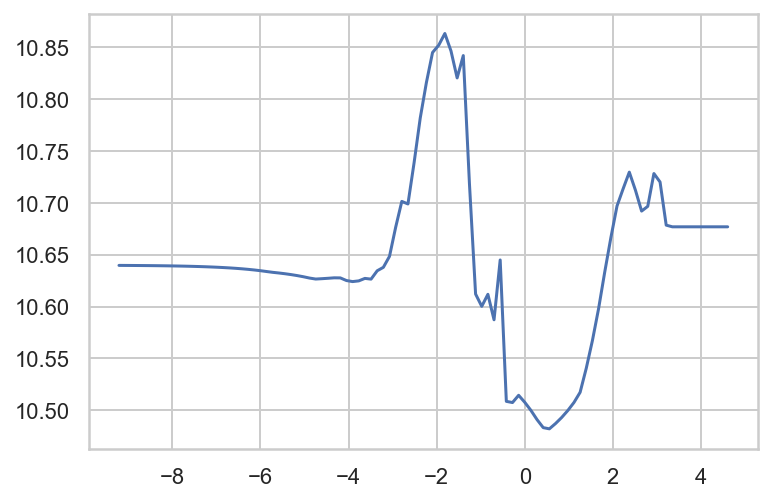

In [492]:
#plotting neg MAE for diff alpha values

df = pd.DataFrame(grid_result.cv_results_)
plt.plot(np.log(alpha), df['mean_test_score'])

In [493]:
lr_model_lasso = LassoCV(alphas= [0.16297508346206452], cv = kfold)
lr_model_lasso.fit(X_train, y_train)
print('Lasso Mean R Squared Score: ', lr_model_lasso.score(
    X_train, y_train))
      

Lasso Mean R Squared Score:  0.012891139027558007


In [494]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

In [495]:
## Note: lars_path takes numpy matrices, not pandas dataframes

from sklearn.linear_model import lars_path

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_train_np, y_train_np, 
                             method='lasso')

Computing regularization path using the LARS ...


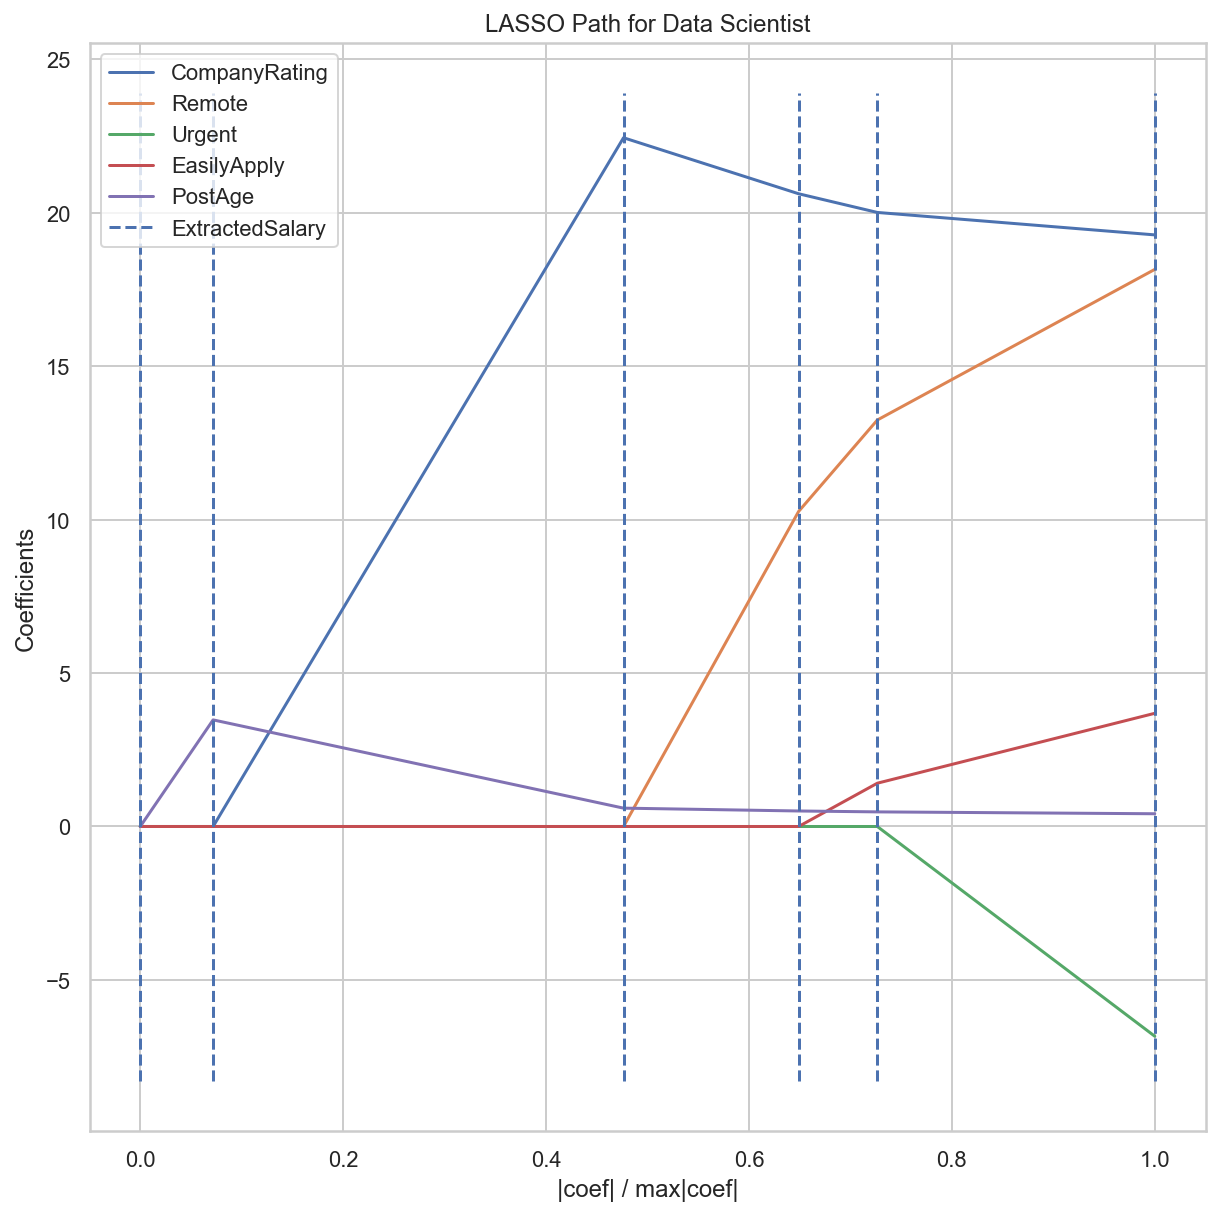

In [544]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path for Data Scientist')
plt.axis('tight')
plt.legend(['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge', 'ExtractedSalary'])
plt.savefig('C:/Users/New User/Desktop/reg/DS_LARS.png', dpi=300, bbox_inches = "tight")
plt.show()

In [500]:
# RIDGE
# Run the cross validation, find the best alpha, 
#refit the model on all the data with that alpha

# use grid search to find alpha
alpha = np.logspace(-4, 2, 100) #np.logspace(-4, -.1, 20)
param_grid = dict(alpha=alpha)
grid_ridge = GridSearchCV(Ridge(), param_grid=param_grid, 
                    scoring=mae, cv = kfold)
grid_result_ridge = grid_ridge.fit(X_train, y_train)


print('Best Score: ', grid_result_ridge.best_score_)
print('Best Param: ', grid_result_ridge.best_params_)

Best Score:  10.816046907558707
Best Param:  {'alpha': 28.48035868435805}


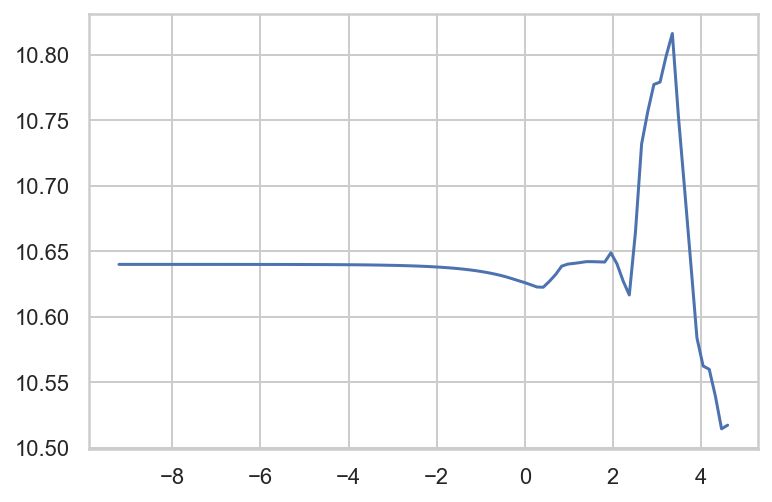

In [501]:
#plotting neg MAE for diff alpha values

df = pd.DataFrame(grid_result_ridge.cv_results_)
plt.plot(np.log(alpha), df['mean_test_score'])

In [502]:
lr_model_ridge = RidgeCV(alphas= [3.5], cv = kfold, scoring=mae)
lr_model_ridge.fit(X_train, y_train)
# print('Ridge Mean R Squared Score: ', lr_model_ridge.mae(
#     X_train, y_train))
lr_model_ridge.best_score_

10.641280327891096

In [503]:
# ELASTIC NET
# Run the cross validation, find the best alpha, 
#refit the model on all the data with that alpha

# use grid search to find alpha
alpha = np.logspace(-4, 2, 100) #np.logspace(-4, -.1, 20)
param_grid = dict(alpha=alpha)
grid_en = GridSearchCV(ElasticNet(), param_grid=param_grid, 
                    scoring=mae, cv = kfold)
grid_result_en = grid_en.fit(X_train, y_train)


print('Best Score: ', grid_result_en.best_score_)
print('Best Param: ', grid_result_en.best_params_)

Best Score:  10.817084232359942
Best Param:  {'alpha': 0.061359072734131756}


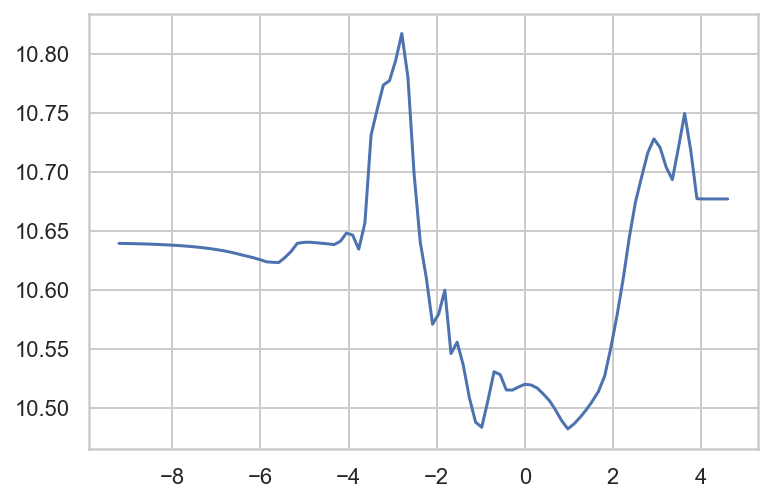

In [504]:
#plotting neg MAE for diff alpha values

df = pd.DataFrame(grid_result_en.cv_results_)
plt.plot(np.log(alpha), df['mean_test_score'])

In [505]:
lr_model_en = ElasticNetCV(alphas= [1], cv = kfold)
lr_model_en.fit(X_train, y_train)
print('ElasticNet Mean R Squared Score: ', lr_model_en.score(
    X_train, y_train))

ElasticNet Mean R Squared Score:  0.005672185040734301


In [506]:
from sklearn.metrics import median_absolute_error

mae2 = median_absolute_error

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression:", f'{mae2(y_test, y_pred): .5f}')

lasso = Lasso(alpha = 24.77).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Lasso Regression:", f'{mae2(y_test, y_pred): .5f}')

ridge = Ridge(alpha = 100.0).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Ridge Regression:", f'{mae2(y_test, y_pred): .5f}')

en = ElasticNet(alpha = 49.77).fit(X_train, y_train)
y_pred = en.predict(X_test)
print("ElasticNet Regression:", f'{mae2(y_test, y_pred): .5f}')

Linear Regression:  14.49755
Lasso Regression:  12.04121
Ridge Regression:  14.26831
ElasticNet Regression:  12.04121


In [540]:
from sklearn.metrics import median_absolute_error

mae2 = median_absolute_error

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression:", f'{mae2(y_test, y_pred): .5f}')

lasso = Lasso(alpha = 0.16297508346206452).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Lasso Regression:", f'{mae2(y_test, y_pred): .5f}')

ridge = Ridge(alpha = 4.3).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Ridge Regression:", f'{mae2(y_test, y_pred): .5f}')

en = ElasticNet(alpha = 1).fit(X_train, y_train)
y_pred = en.predict(X_test)
print("ElasticNet Regression:", f'{mae2(y_test, y_pred): .5f}')

Linear Regression:  14.49755
Lasso Regression:  14.18589
Ridge Regression:  14.40460
ElasticNet Regression:  13.20622


# Fresh Posts as Training Data

In [15]:
df_train, df_val = train_test_split(fresh_posts, test_size=.2, random_state=5)
print(df_train.shape)
print(df_val.shape)

(235, 14)
(59, 14)


In [16]:
# ALL FEATURES

lr = LinearRegression()
lr.fit(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))

#df_test = pd.read_csv('data/1_test.csv')

y_pred_2 = lr.predict(df_val[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for validation data is: ' + str(medae(df_val['ExtractedSalary'], y_pred_2)))

Median absolute error for training data is: 14.124401205487544
Median absolute error for validation data is: 10.05664207924832


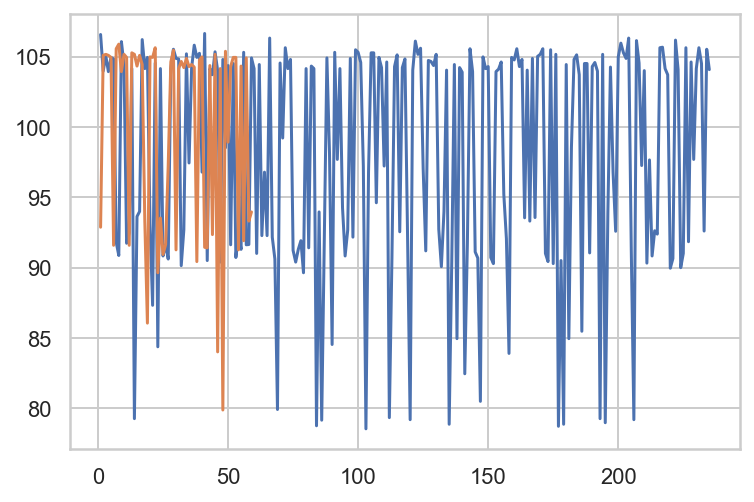

In [17]:
x1 = range(1, 236)
x2 = range(1, 60)
y1 = y_pred
y2 = y_pred_2
plt.plot(x1, y1)
plt.plot(x2, y2)

In [18]:
# ALL FEATURES EXCEPT EASILY APPLY

lr = LinearRegression()
lr.fit(df_train[['CompanyRating', 'Remote', 'Urgent', 'PostAge']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['CompanyRating', 'Remote', 'Urgent', 'PostAge']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))

#df_test = pd.read_csv('data/1_test.csv')

y_pred_2 = lr.predict(df_val[['CompanyRating', 'Remote', 'Urgent', 'PostAge']])
print('Median absolute error for validation data is: ' + str(medae(df_val['ExtractedSalary'], y_pred_2)))

Median absolute error for training data is: 14.839318628789002
Median absolute error for validation data is: 13.28820972231307


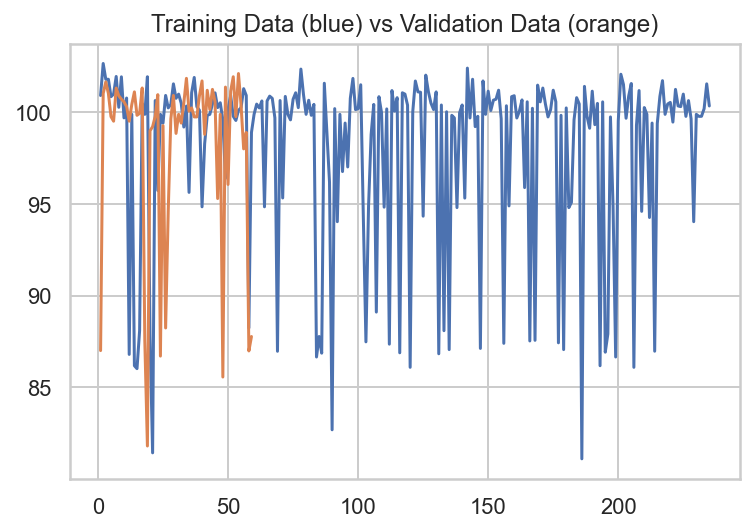

In [19]:
x1 = range(1, 236)
x2 = range(1, 60)
y1 = y_pred
y2 = y_pred_2
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.title('Training Data (blue) vs Validation Data (orange)')
plt.savefig('train_valid.png')

In [20]:
# TAKING OUT URGENT

lr = LinearRegression()
lr.fit(df_train[['CompanyRating', 'Remote', 'PostAge']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['CompanyRating', 'Remote', 'PostAge']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))

#df_test = pd.read_csv('data/1_test.csv')

y_pred_2 = lr.predict(df_val[['CompanyRating', 'Remote', 'PostAge']])
print('Median absolute error for validation data is: ' + str(medae(df_val['ExtractedSalary'], y_pred_2)))

Median absolute error for training data is: 14.509674183532283
Median absolute error for validation data is: 7.120999667838689


In [21]:
# TAKING OUT POSTAGE

lr = LinearRegression()
lr.fit(df_train[['CompanyRating', 'Remote']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['CompanyRating', 'Remote']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))

#df_test = pd.read_csv('data/1_test.csv')

y_pred_2 = lr.predict(df_val[['CompanyRating', 'Remote']])
print('Median absolute error for validation data is: ' + str(medae(df_val['ExtractedSalary'], y_pred_2)))

Median absolute error for training data is: 14.523377098617956
Median absolute error for validation data is: 7.63651895464622


In [22]:
# TAKING OUT REMOTE

lr = LinearRegression()
lr.fit(df_train[['CompanyRating', 'PostAge']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['CompanyRating', 'PostAge']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))

#df_test = pd.read_csv('data/1_test.csv')

y_pred_2 = lr.predict(df_val[['CompanyRating', 'PostAge']])
print('Median absolute error for validation data is: ' + str(medae(df_val['ExtractedSalary'], y_pred_2)))

Median absolute error for training data is: 15.209219814817189
Median absolute error for validation data is: 9.202961841929238


In [125]:
# ALL FEATURES EXCEPT COMPANY RATING

lr = LinearRegression()
lr.fit(df_train[['Remote', 'Urgent', 'EasilyApply', 'PostAge']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))

#df_test = pd.read_csv('data/1_test.csv')

y_pred_2 = lr.predict(df_val[['Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for validation data is: ' + str(medae(df_val['ExtractedSalary'], y_pred_2)))

Median absolute error for training data is: 13.666617217293819
Median absolute error for validation data is: 9.765577224338784


# Old Posts as Training Data

In [23]:
df_train, df_val = train_test_split(old_posts, test_size=.2, random_state=5)
print(df_train.shape)
print(df_val.shape)

(534, 14)
(134, 14)


In [24]:
# ALL FEATURES

lr = LinearRegression()
lr.fit(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))

#df_test = pd.read_csv('data/1_test.csv')

y_pred_2 = lr.predict(df_val[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for validation data is: ' + str(medae(df_val['ExtractedSalary'], y_pred_2)))

Median absolute error for training data is: 10.963399137721119
Median absolute error for validation data is: 10.318431103690578


# Testing On Original Dataset

In [25]:
# TESTING USING ORIGINAL DATASET

lr = LinearRegression()
lr.fit(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))

df_test = pd.read_csv('C:/Users/New User/Documents/GitHub/NBM_Regression_Student/ds_train.csv')

y_pred_2 = lr.predict(df_test[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for validation data is: ' + str(medae(df_test['ExtractedSalary'], y_pred_2)))


Median absolute error for training data is: 10.963399137721119
Median absolute error for validation data is: 11.5


# Testing Old Posts on Test Set

In [45]:
# TESTING ON TEST SET

lr = LinearRegression()
lr.fit(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))

df_test = pd.read_csv('C:/Users/New User/Documents/GitHub/NBM_Regression_Student/ds_test.csv')

y_pred_2 = lr.predict(df_test[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for validation data is: ' + str(medae(df_test['ExtractedSalary'], y_pred_2)))

Median absolute error for training data is: 10.963399137721119
Median absolute error for validation data is: 16.352236593723944


# Testing same Test Set using Original Training Data Set from data df

In [46]:
df_train, df_val = train_test_split(data, test_size=.2, random_state=5)
print(df_train.shape)
print(df_val.shape)

(769, 14)
(193, 14)


In [75]:
# TESTING ON TEST SET

lr = LinearRegression()
lr.fit(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))

df_test = pd.read_csv('C:/Users/New User/Documents/GitHub/NBM_Regression_Student/ds_test.csv')

y_pred_2 = lr.predict(df_test[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']])
print('Median absolute error for test data is: ' + str(medae(df_test['ExtractedSalary'], y_pred_2)))

Median absolute error for training data is: 12.143506695513807
Median absolute error for test data is: 13.466510445781296


In [48]:
df = data

In [49]:
def diagnostic_plots(y_pred, y_true):
    resid = y_pred - y_true
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

In [50]:
df.shape

(962, 14)

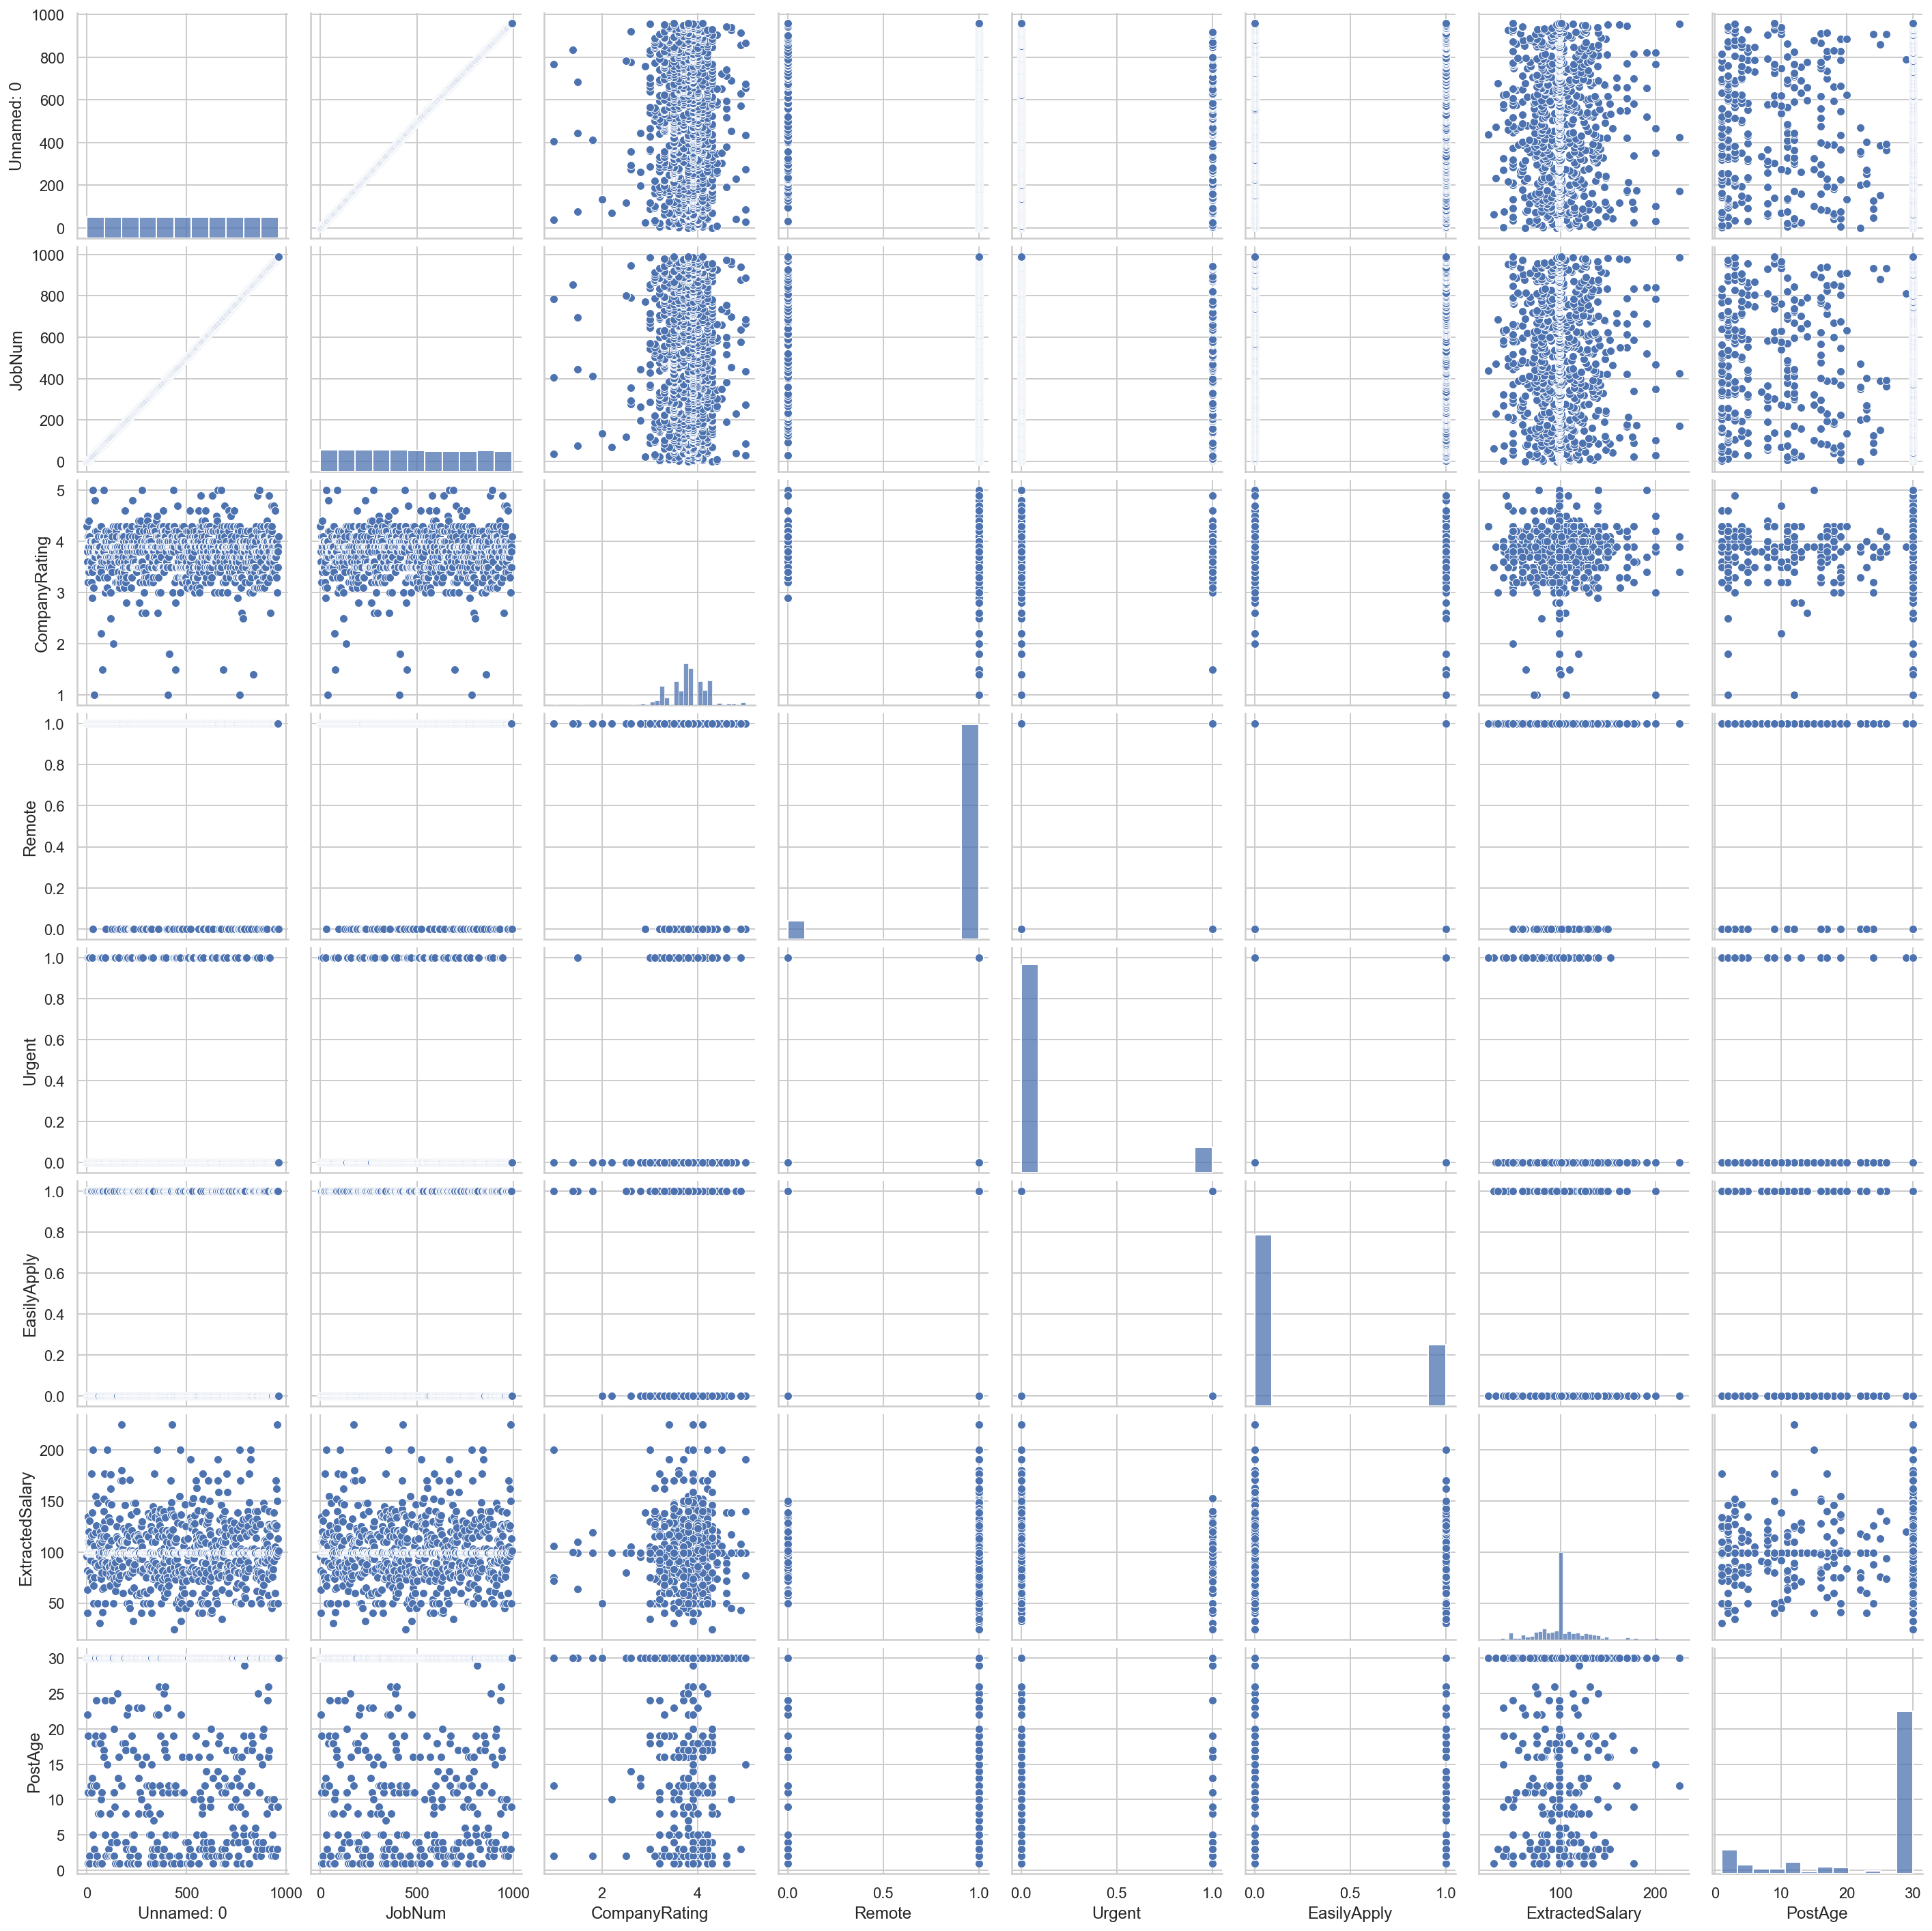

In [51]:
sns.pairplot(df);

# Split into train, val, and test

In [52]:
X, X_test, y, y_test = train_test_split(df[['CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge']], 
                                        df['ExtractedSalary'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [74]:
# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)
print(f"{lr.score(X_train,y_train):,.2f}")

0.02


In [54]:
# Score on validation set
print(f"{lr.score(X_val,y_val):,.2f}")

-0.01


In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
print(f"{lr_poly.score(X_train_poly,y_train):,.2f}")

0.06


In [57]:
# Score on validation set
print(f"{lr_poly.score(X_val_poly, y_val):,.2f}")

-0.02


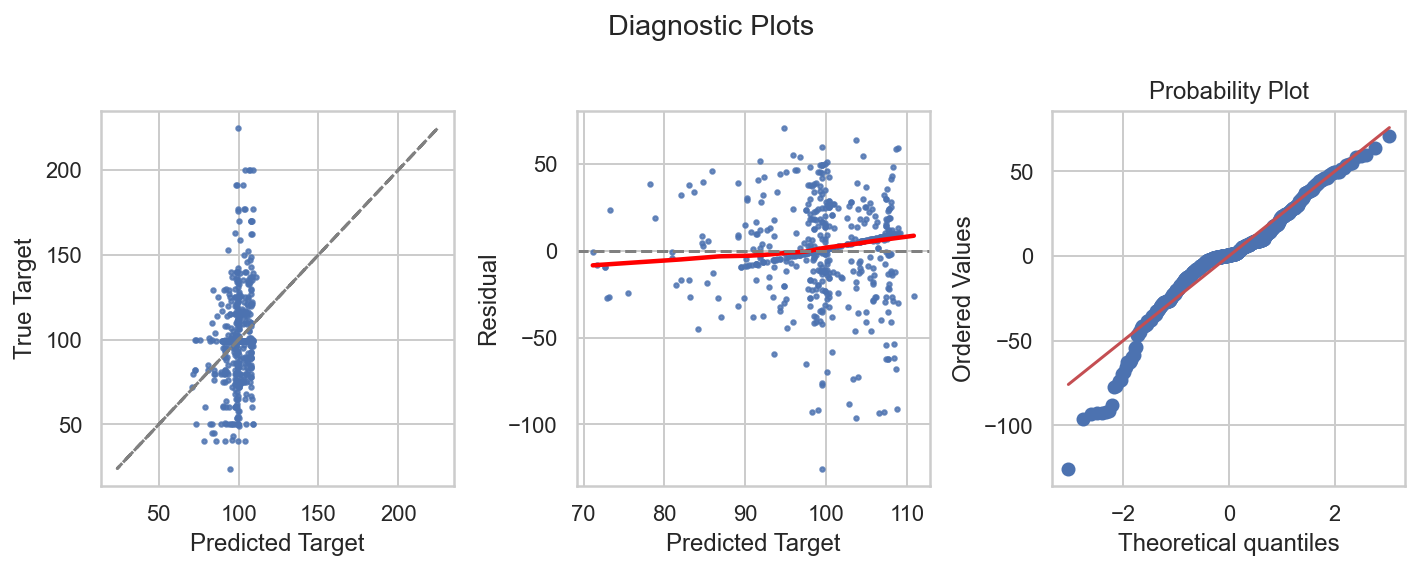

In [58]:
diagnostic_plots(lr_poly.predict(X_train_poly), y_train)

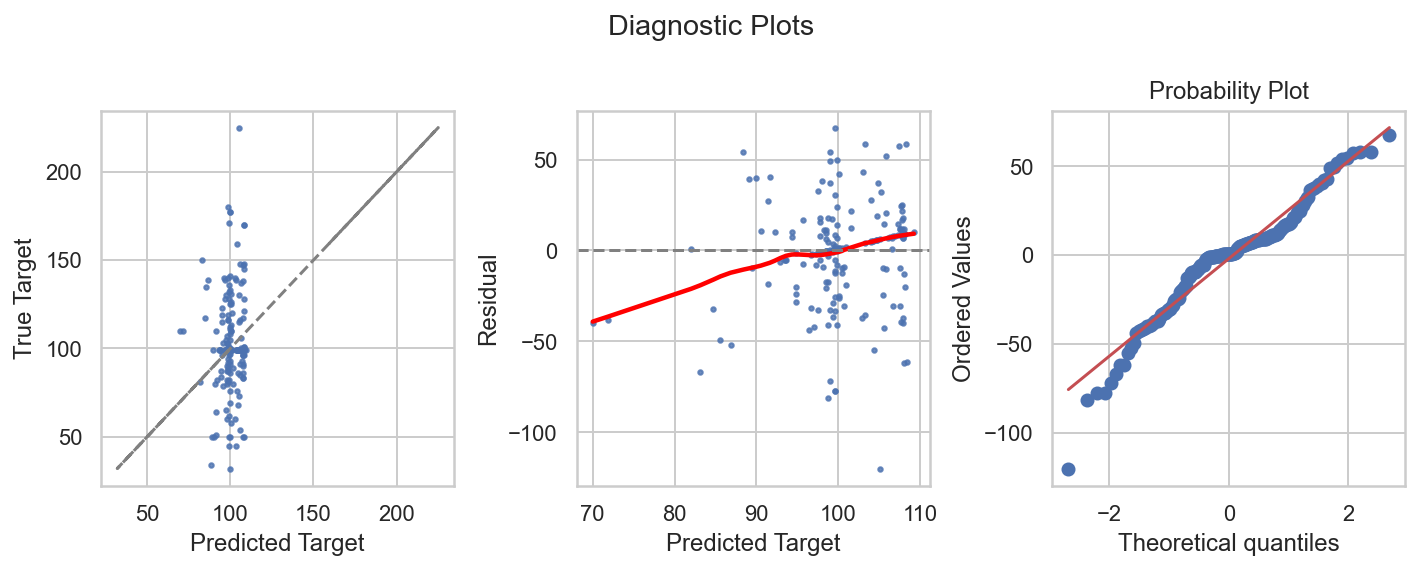

In [59]:

diagnostic_plots(lr_poly.predict(X_val_poly), y_val)

In [60]:
poly.get_feature_names_out()

array(['1', 'CompanyRating', 'Remote', 'Urgent', 'EasilyApply', 'PostAge',
       'CompanyRating^2', 'CompanyRating Remote', 'CompanyRating Urgent',
       'CompanyRating EasilyApply', 'CompanyRating PostAge', 'Remote^2',
       'Remote Urgent', 'Remote EasilyApply', 'Remote PostAge',
       'Urgent^2', 'Urgent EasilyApply', 'Urgent PostAge',
       'EasilyApply^2', 'EasilyApply PostAge', 'PostAge^2'], dtype=object)

In [61]:
lr_poly.coef_

array([ 0.00000000e+00, -1.61898874e+00,  1.70147921e+01,  3.23749671e-01,
       -5.65123233e+00, -6.01123372e-01,  2.05573366e-01, -4.22547215e+00,
        1.58299952e+00, -1.65102130e+00,  2.33191529e-01,  1.70147921e+01,
       -1.39588562e+01, -7.70370320e+00, -3.86363690e-01,  3.23749671e-01,
       -4.36897470e+00,  2.19667442e-02, -5.65123233e+00,  1.13138401e+00,
       -4.42693833e-03])

In [62]:
for name, coef in zip(poly.get_feature_names_out(), lr_poly.coef_):
    print(f"{name:<6}: {coef: .3f}")

1     :  0.000
CompanyRating: -1.619
Remote:  17.015
Urgent:  0.324
EasilyApply: -5.651
PostAge: -0.601
CompanyRating^2:  0.206
CompanyRating Remote: -4.225
CompanyRating Urgent:  1.583
CompanyRating EasilyApply: -1.651
CompanyRating PostAge:  0.233
Remote^2:  17.015
Remote Urgent: -13.959
Remote EasilyApply: -7.704
Remote PostAge: -0.386
Urgent^2:  0.324
Urgent EasilyApply: -4.369
Urgent PostAge:  0.022
EasilyApply^2: -5.651
EasilyApply PostAge:  1.131
PostAge^2: -0.004


In [63]:
from sklearn.linear_model import Lasso

In [68]:
# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a LASSO model using polynomial features for various alphas
print("\t\tTrain\tTest")

alphas = [10, 100, 1000, 10000, 100000, 1000000]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_poly_scaled,y_train)
    print(f"alpha={alpha}: \t{lasso.score(X_train_poly_scaled,y_train):.4f} \t{lasso.score(X_val_poly_scaled,y_val):.4f}")

		Train	Test
alpha=10: 	0.0000 	-0.0087
alpha=100: 	0.0000 	-0.0087
alpha=1000: 	0.0000 	-0.0087
alpha=10000: 	0.0000 	-0.0087
alpha=100000: 	0.0000 	-0.0087
alpha=1000000: 	0.0000 	-0.0087


In [69]:
lasso=Lasso(alpha=10)
lasso.fit(X_train_poly_scaled,y_train)

Lasso(alpha=10)

In [70]:
# Fit a LASSO model on full dataset using scaled, polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = Lasso(alpha=0.1)
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

print(f"{lasso.score(X_test_poly_scaled, y_test):,.2f}")

0.04


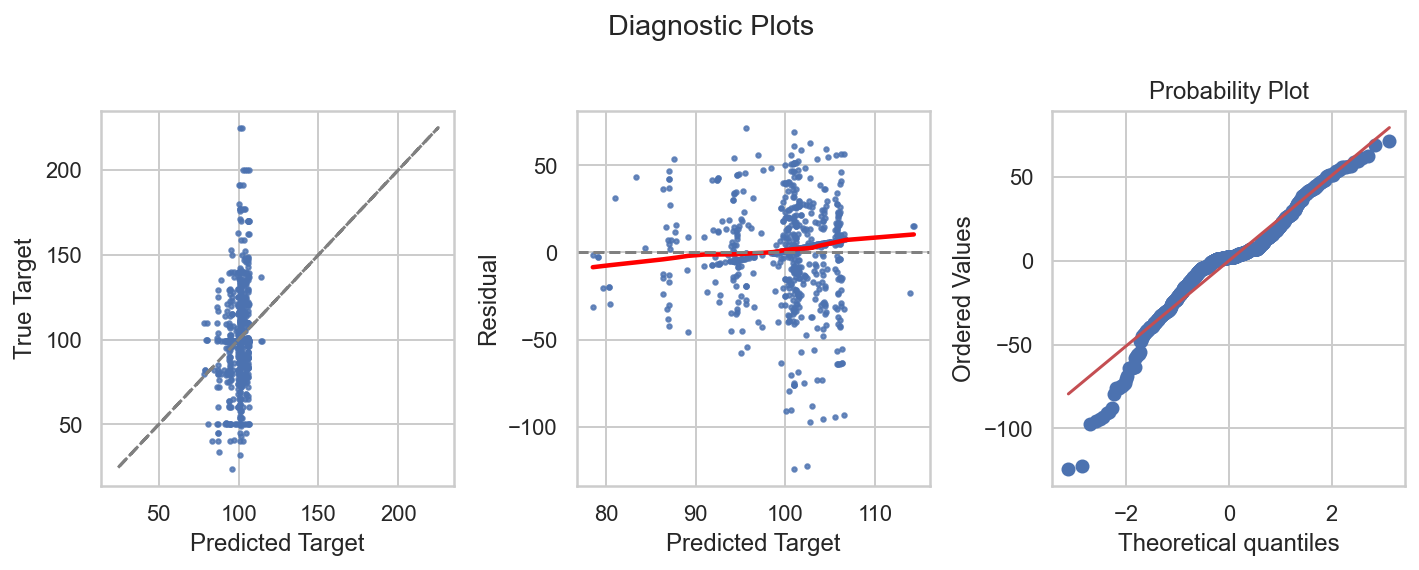

In [71]:
diagnostic_plots(lasso.predict(X_poly_scaled), y)

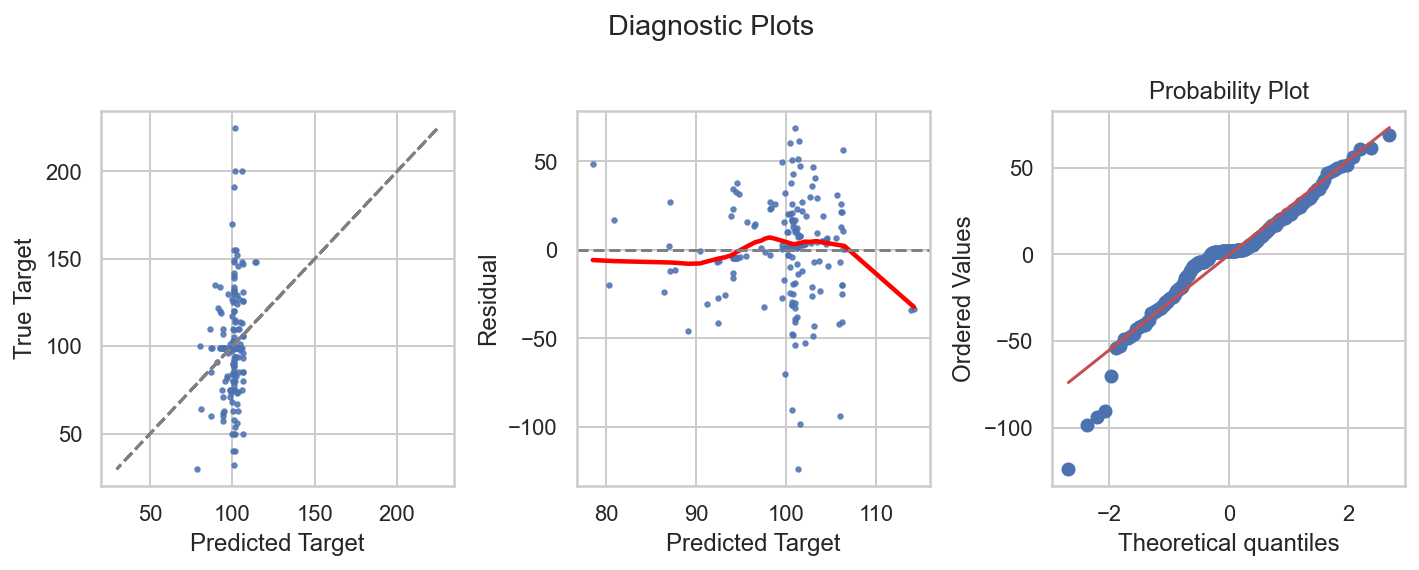

In [72]:
diagnostic_plots(lasso.predict(X_test_poly_scaled), y_test)